In [17]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'

# Practice Exam - EDA - College Majors

Your solutions should include code written to answer the questions AND words describing the results. For each problem:

1. Write code to get the answers. It is okay to copy and paste from our lecture notes or your homework assignments.
2. Describe what the code output is telling you.
3. Explain any interesting aspects of your results.

------------------------
-------------------------

The first step in the process of turning information into knowledge process is to summarize and describe the raw information - the data.
In this assignment we explore data on college majors and earnings, specifically the data begin the FiveThirtyEight story ["The Economic Guide To Picking A College Major"](https://fivethirtyeight.com/features/the-economic-guide-to-picking-a-college-major/).

These data originally come from the American Community Survey (ACS) 2010-2012 Public Use Microdata Series.
While this is outside the scope of this assignment, if you are curious about how raw data from the ACS were cleaned and prepared, see [the code](https://github.com/fivethirtyeight/data/blob/master/college-majors/college-majors-rscript.R) FiveThirtyEight authors used.

We should also note that there are many considerations that go into picking a major.
Earnings potential and employment prospects are two of them, and they are important, but they don't tell the whole story.
Keep this in mind as you analyze the data.

In [25]:
file_location = 'https://joannabieri.com/introdatascience/data/recent-grads.csv'
DF_raw = pd.read_csv(file_location)

In [26]:
DF_raw

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308


### 1. Describe the data that you see here.

* How many variables?
* How man observations?
* Are the variables categorical or numerical?
* Are there any variables that you don't know what they mean? If so [CLICK HERE - to see the Git Repo for the data where the variables are defined](https://github.com/fivethirtyeight/data/tree/master/college-majors)


In [23]:
DF_raw.shape

(173, 21)

In [24]:
DF_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rank                  173 non-null    int64  
 1   Major_code            173 non-null    int64  
 2   Major                 173 non-null    object 
 3   Total                 172 non-null    float64
 4   Men                   172 non-null    float64
 5   Women                 172 non-null    float64
 6   Major_category        173 non-null    object 
 7   ShareWomen            172 non-null    float64
 8   Sample_size           173 non-null    int64  
 9   Employed              173 non-null    int64  
 10  Full_time             173 non-null    int64  
 11  Part_time             173 non-null    int64  
 12  Full_time_year_round  173 non-null    int64  
 13  Unemployed            173 non-null    int64  
 14  Unemployment_rate     173 non-null    float64
 15  Median                1

**(Click Here to Explain your Results)**

### 2. Answer some questions about the data

* Which major has the lowest unemployment rate? Show a data frame that answers this question, but only show columns that are useful to the answer.
* Which major has the highest percentage of women? Show a data frame that answers this question, but only show columns that are useful to the answer.
* How do the distributions of median income compare across major categories?
    * First get a value count on what major categories are in the data. What categories are most or least represented?
    * Do some summary statistics using the .group_by() command to see the statistics for each major category.
    * Make a histogram that explores median income for each of the major categories (facet_col). How did you choose your number of bins?
    * Why do we often choose the median, rather than the mean, to describe the typical income of a group of people? Look this up online if you don't know the answer!
    * Answer the question: Which major category has the highest typical (you'll need to decide what this means) median income?

In [ ]:
DF_raw.columns

In [8]:
# Which major has the lowest unemployment rate? Show a data frame that answers this question, 
# but only show columns that are useful to the answer.
my_columns = ['Unemployment_rate','Major']
DF_raw[my_columns].sort_values('Unemployment_rate')

mask = DF_raw['Unemployment_rate'] >0
DF_new = DF_raw[mask]
DF_new[my_columns].sort_values('Unemployment_rate')

,Unemployment_rate,Major
14,0.006334,ENGINEERING MECHANICS PHYSICS AND SCIENCE
19,0.011690,COURT REPORTING
119,0.016203,MATHEMATICS TEACHER EDUCATION
0,0.018381,PETROLEUM ENGINEERING
64,0.019642,GENERAL AGRICULTURE
...,...,...
29,0.128426,PUBLIC POLICY
170,0.149048,CLINICAL PSYCHOLOGY
84,0.151850,COMPUTER NETWORKING AND TELECOMMUNICATIONS
89,0.159491,PUBLIC ADMINISTRATION


In [9]:
# Do some summary statistics using the .group_by() 
# command to see the statistics for each major category.
some_cols = ['Total','Major_category']
DF_raw[some_cols].groupby('Major_category').describe()

Total                                \
                                    count           mean            std   
Major_category                                                            
Agriculture & Natural Resources       9.0    8402.222222    7135.038626   
Arts                                  8.0   44641.250000   33635.404025   
Biology & Life Science               14.0   32418.714286   72233.366437   
Business                             13.0  100182.769231  111655.873560   
Communications & Journalism           4.0   98150.250000   77782.804648   
Computers & Mathematics              11.0   27182.545455   39493.602987   
Education                            16.0   34945.562500   49464.706843   
Engineering                          29.0   18537.344828   25231.657274   
Health                               12.0   38602.500000   54985.649362   
Humanities & Liberal Arts            15.0   47564.533333   53315.821235   
Industrial Arts & Consumer Services   7.0   32827.428571   45004.155763   
Interdisciplinary                     1.0   12296.000000            NaN   
Law & Public Policy                   5.0   35821.400000   65557.338070   
Physical Sciences                    10.0   18547.900000   25875.330338   
Psychology & Social Work              9.0   53445.222222  128654.924027   
Social Science                        9.0   58885.111111   67698.828368   

                                                                            \
                                         min       25%      50%        75%   
Major_category                                                               
Agriculture & Natural Resources        685.0   2439.00   7416.0   13773.00   
Arts                                  3340.0  16795.25  41005.0   64084.75   
Biology & Life Science                1329.0   4975.50  12184.5   21120.00   
Business                              3777.0  17947.00  25894.0  198633.00   
Communications & Journalism          52824.0  53077.50  62890.5  107963.25   
Computers & Mathematics                609.0   5595.00   8066.0   27366.50   
Education                              804.0   9233.25  18661.5   31398.50   
Engineering                            720.0   2906.00   4790.0   18968.00   
Health                               11123.0  15282.00  19322.0   34769.00   
Humanities & Liberal Arts             3079.0  17777.00  30207.0   51530.00   
Industrial Arts & Consumer Services    124.0   6472.50  15150.0   38249.50   
Interdisciplinary                    12296.0  12296.00  12296.0   12296.00   
Law & Public Policy                   1148.0   5629.00   5978.0   13528.00   
Physical Sciences                     1436.0   2012.50   3230.5   26849.50   
Psychology & Social Work              1386.0   2854.00   4626.0    9628.00   
Social Science                        3283.0  12920.00  19879.0  115433.00   

                                               
                                          max  
Major_category                                 
Agriculture & Natural Resources       21573.0  
Arts                                 103480.0  
Biology & Life Science               280709.0  
Business                             329927.0  
Communications & Journalism          213996.0  
Computers & Mathematics              128319.0  
Education                            170862.0  
Engineering                           91227.0  
Health                               209394.0  
Humanities & Liberal Arts            194673.0  
Industrial Arts & Consumer Services  125074.0  
Interdisciplinary                     12296.0  
Law & Public Policy                  152824.0  
Physical Sciences                     66530.0  
Psychology & Social Work             393735.0  
Social Science                       182621.0

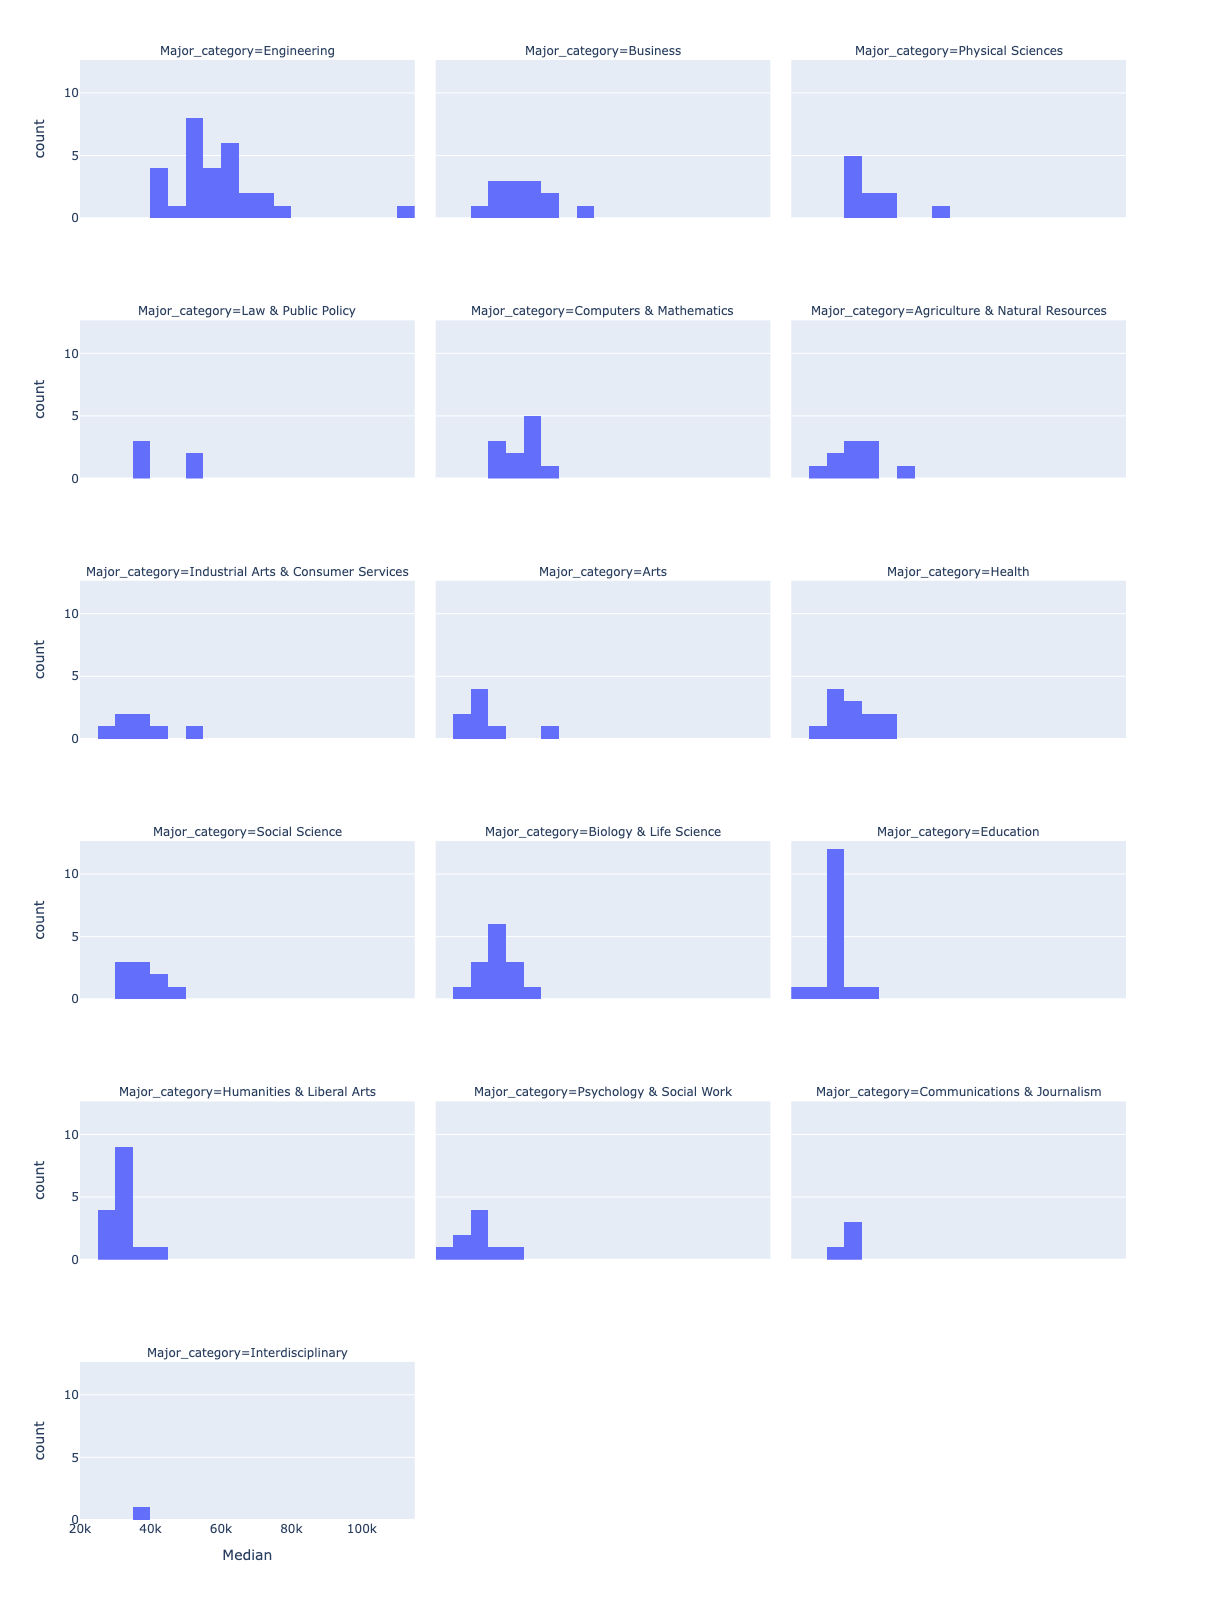

In [10]:
# Make a histogram that explores median income for each of the major categories (facet_col).
# How did you choose your number of bins?

fig = px.histogram(DF_raw,
                  x = 'Median',
                   nbins = 18,
                  facet_col='Major_category',
                  facet_col_wrap=3)

fig.update_layout(autosize=False,
                  width=800,
                  height=1600)

fig.show()

In [11]:
# Answer the question: Which major category has the highest typical 
# (you'll need to decide what this means) median income?

my_columns = ['Major_category','Median','Total']
DF_raw[my_columns].groupby('Major_category').mean()

,Median,Total
Major_category,,
Agriculture & Natural Resources,36900.000000,8402.222222
Arts,33062.500000,44641.250000
Biology & Life Science,36421.428571,32418.714286
Business,43538.461538,100182.769231
Communications & Journalism,34500.000000,98150.250000
Computers & Mathematics,42745.454545,27182.545455
Education,32350.000000,34945.562500
Engineering,57382.758621,18537.344828
Health,36825.000000,38602.500000


**(Click Here to Explain your Results)**

### 3. More complicated questions

* Are all STEM fields the same in terms job opportunities?
    * Assume the following are STEM major categories
    
  ``` ["Biology & Life Science", "Computers & Mathematics", "Engineering","Physical Sciences"]```
  
    * Create a DataFrame (using a mask) so you only look at STEM majors.
    * Which STEM majors have median salaries equal to or less than the median for all majors' median earnings?
* What types of majors do women tend to major in?
    * Create a scatterplot of median income vs. proportion of women in that major, coloured by whether the major is in a STEM field or not.

In [13]:
# Create the mask
# 4 different majors

mask = (DF_raw['Major_category']=="Biology & Life Science") | (DF_raw['Major_category']=="Computers & Mathematics") | (DF_raw['Major_category']=="Engineering") | (DF_raw['Major_category']=="Physical Sciences")
# Mask the df
DF_stem = DF_raw[mask]
DF_stem

In [14]:
# Find the Median for all majors
# Find the Median for all stem majors
# Find the Median for each stem major

median_all = DF_raw['Median'].median()
median_all

In [15]:
# ["Biology & Life Science", "Computers & Mathematics", "Engineering","Physical Sciences"]
median_stem = DF_stem['Median'].median()
print(median_stem)

major_cat = "Biology & Life Science"
mask = DF_stem['Major_category'] == major_cat
cat_median = DF_stem[mask]['Median'].median()
print(cat_median)

**(Click Here to Explain your Results)**

In [ ]:
DF_raw.columns

In [ ]:
my_col = ['Major', 'Major_category', 'ShareWomen']

DF_raw[my_col].sort_values(by='ShareWomen',ascending=False).head(25)

In [ ]:
px.scatter(DF_raw,x='Median', y='ShareWomen')

### 4. Ask a question of interest to you.

In [27]:
#
DF_raw['Major_category'].value_counts()

Major_category
Engineering                            29
Education                              16
Humanities & Liberal Arts              15
Biology & Life Science                 14
Business                               13
Health                                 12
Computers & Mathematics                11
Physical Sciences                      10
Agriculture & Natural Resources        10
Social Science                          9
Psychology & Social Work                9
Arts                                    8
Industrial Arts & Consumer Services     7
Law & Public Policy                     5
Communications & Journalism             4
Interdisciplinary                       1
Name: count, dtype: int64

**(Click Here to Explain your Results)**

In [35]:
my_cat = 'Business'

mask = DF_raw['Major_category'] == my_cat
DF_bus = DF_raw[mask]
DF_bus

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
6,7,6202,ACTUARIAL SCIENCE,3777.0,2110.0,1667.0,Business,0.441356,51,2912,...,296,2482,308,0.095652,62000,53000,72000,1768,314,259
24,25,6212,MANAGEMENT INFORMATION SYSTEMS AND STATISTICS,18713.0,13496.0,5217.0,Business,0.278790,278,16413,...,2420,13017,1015,0.058240,51000,38000,60000,6342,5741,708
27,28,6204,OPERATIONS LOGISTICS AND E-COMMERCE,11732.0,7921.0,3811.0,Business,0.324838,156,10027,...,1183,7724,504,0.047859,50000,40000,60000,1466,3629,285
35,36,6207,FINANCE,174506.0,115030.0,59476.0,Business,0.340825,2189,145696,...,21463,108595,9413,0.060686,47000,35000,64000,24243,48447,9910
37,38,6205,BUSINESS ECONOMICS,13302.0,7575.0,5727.0,Business,0.430537,199,10914,...,1937,8000,1165,0.096448,46000,33000,58000,1578,4612,1284
40,41,6201,ACCOUNTING,198633.0,94519.0,104114.0,Business,0.524153,2042,165527,...,27693,123169,12411,0.069749,45000,34000,56000,11417,39323,10886
57,58,6200,GENERAL BUSINESS,234590.0,132238.0,102352.0,Business,0.436302,2380,190183,...,36241,138299,14946,0.072861,40000,30000,55000,29334,100831,27320
59,60,6210,INTERNATIONAL BUSINESS,25894.0,10624.0,15270.0,Business,0.589712,260,19660,...,4890,12823,2092,0.096175,40000,30000,50000,3383,9482,3046
62,63,6299,MISCELLANEOUS BUSINESS & MEDICAL ADMINISTRATION,17947.0,10285.0,7662.0,Business,0.426924,244,14826,...,3366,10637,1150,0.071983,40000,30000,51000,2236,8937,1758
76,77,6203,BUSINESS MANAGEMENT AND ADMINISTRATION,329927.0,173809.0,156118.0,Business,0.473190,4212,276234,...,50357,199897,21502,0.072218,38000,29000,50000,36720,148395,32395


In [36]:
DF_bus['Major'].unique()

array(['ACTUARIAL SCIENCE',
       'MANAGEMENT INFORMATION SYSTEMS AND STATISTICS',
       'OPERATIONS LOGISTICS AND E-COMMERCE', 'FINANCE',
       'BUSINESS ECONOMICS', 'ACCOUNTING', 'GENERAL BUSINESS',
       'INTERNATIONAL BUSINESS',
       'MISCELLANEOUS BUSINESS & MEDICAL ADMINISTRATION',
       'BUSINESS MANAGEMENT AND ADMINISTRATION',
       'MARKETING AND MARKETING RESEARCH',
       'HUMAN RESOURCES AND PERSONNEL MANAGEMENT',
       'HOSPITALITY MANAGEMENT'], dtype=object)

In [38]:
DF_bus.keys()

Index(['Rank', 'Major_code', 'Major', 'Total', 'Men', 'Women',
       'Major_category', 'ShareWomen', 'Sample_size', 'Employed', 'Full_time',
       'Part_time', 'Full_time_year_round', 'Unemployed', 'Unemployment_rate',
       'Median', 'P25th', 'P75th', 'College_jobs', 'Non_college_jobs',
       'Low_wage_jobs'],
      dtype='object')

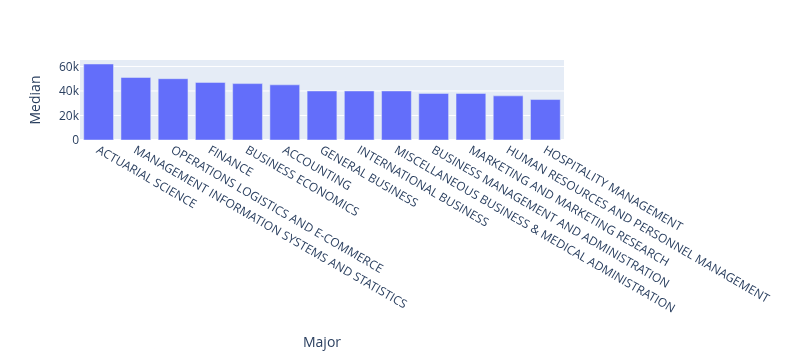

In [41]:
px.bar(DF_bus,x='Major',y='Median')


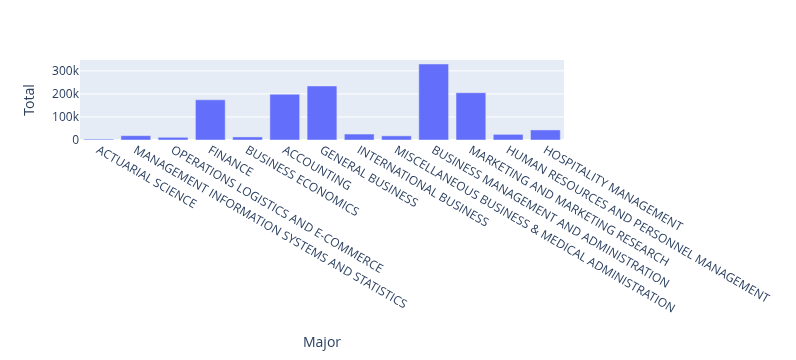

In [42]:
px.bar(DF_bus,x='Major',y='Total')